In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

In [2]:
data_2019 = pd.read_csv(r"C:\PPP\Thesis\Database\CSV format data by python\PPI data2019.csv")

#drop the first and the second column
data_2019.drop(data_2019.columns[[0, 1]], axis=1, inplace=True)
#dataset to draw the figure 1
new_data_2019 = data_2019.copy()
#drop 'fee', 'physical', and 'investment'
data_2019.drop(columns=['fees', 'physical', 'investment'], inplace=True)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_2019.shape

(10421, 68)

In [4]:
#combine the project with the same ID, which is the same project, the 'investment_real', 'realphysicalassets', and 'realfeestogovernment'
#will be added, while other column will be not changed based on the first project.
number_of_ID = data_2019.ID.value_counts()
number_larger_than1 = number_of_ID[number_of_ID > 1]
number_of_nonunique_ID = number_larger_than1.index.values
new_data = data_2019.copy()

delete_index = []
for id in number_of_nonunique_ID:
    data_i = data_2019[data_2019.ID == id]
    data_i.sort_values(by=['IY'])
    newlist = list(data_i.iloc[1:].index.values)
    delete_index.extend(newlist)
    
delete_index

new_data.drop([i for i in delete_index], inplace=True)
new_data = new_data.loc[new_data.PPP == 'PPP Project']
#PPP proejcts
new_data.drop(columns=['ID', 'income', 'stype', 'type', 'GDP', 'population', 'lendingtype', 'lendingtypename', 'CPI2019', 'incomelevel',
                      'adminregionname', 'incomelevelname', 'adminregion', 'investment_real', 'IDA', 'Segment', 'shareborder',
                      'MLS', 'name', 'realfeestogovernment', 'realphysicalassets', 'PublicDisclosure', 'intl_debt',
                      'l_debt', 'UP', 'ssector', 'DescriptionOfSource', 'bordercountries', 'Renewables', 'equity', 'debt', 'c_debt', 'm_debt',
                      'b_debt', 'Description', 'GGC', 'OSR', 'BS', 'PCO', 'VDGS', 'numberb', 'Sponsorinte', 'i_debt', 'p_debt', 'regionname',
                      'PRS', 'SponsorCountry', 'CAM', 'bid_crit', 'TIGS', 'VIGS', 'private', 'PPP', 'FundingYear', 'technol', 'pcapacity',
                      'capacity', 'region'], inplace=True)
#replace month with number
month_number = np.arange(1, 13)
month_string = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for number, string in zip(month_number, month_string):
    new_data.loc[new_data.FCM == string, 'FCM'] = number
    
df = pd.DataFrame({'year': new_data.FCY,
                   'month': new_data.FCM,
                  'day': np.ones(new_data.shape[0])})
new_data.FCY = pd.to_datetime(df)
new_data.drop(columns=['FCM'], inplace=True)    
#convert the DSU to datetime
new_data.DSU = pd.to_datetime(new_data.DSU)
new_data['Duration'] = (new_data.DSU - new_data.FCY) / np.timedelta64(1,'Y')
# proejcts with different status. 
PPP_Cancelled = new_data[new_data['status_n'] == 'Cancelled']
PPP_Active = new_data[new_data['status_n'] == 'Active']
PPP_Concluded = new_data[new_data['status_n'] == 'Concluded']
PPP_Distressed = new_data[new_data['status_n'] == 'Distressed']
PPP_Contract_Failure = pd.concat([PPP_Cancelled, PPP_Distressed])

In [16]:
new_data.shape

(7096, 10)

In [13]:
new_data.to_csv(r"C:\Users\Meghdad\Desktop\CSV1.csv")

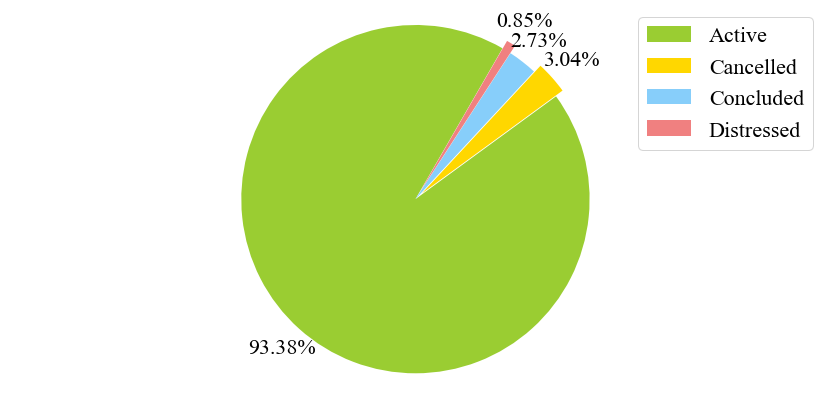

In [4]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)

plt.rcParams['font.family'] = 'Times new roman'
plt.rcParams.update({'font.size': 22})

labels = ['Active', 'Cancelled', 'Concluded', 'Distressed']
sizes = [93.38, 3.04, 2.73, 0.85]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.05, 0, 0.05) 
patches, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, shadow=False, startangle=60, autopct='%1.2f%%',
                                   pctdistance=1.15)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.subplots_adjust(left=0.4, right=0.88, top=0.95, bottom=0.12)

plt.tight_layout()
#plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\4.png", dpi=1000)

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Anaconda

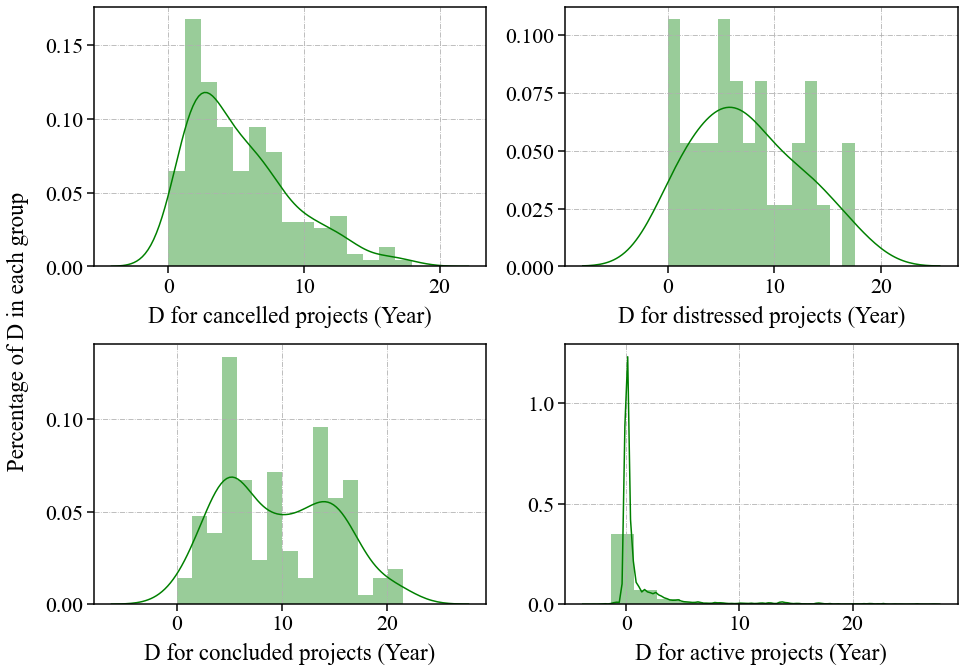

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.text(0.02, 0.5, 'Percentage of D in each group', va='center', rotation='vertical', fontsize=23, fontfamily='times new roman')

ax1 = ax[0, 0]
ax2 = ax[0, 1]
ax3 = ax[1, 0]
ax4 = ax[1, 1]

sns.distplot(PPP_Cancelled.Duration, ax=ax1, bins=15, color='green')
sns.distplot(PPP_Distressed.Duration, ax=ax2, bins=15, color='green')
sns.distplot(PPP_Concluded.Duration, ax=ax3, bins=15, color='green')
sns.distplot(PPP_Active.Duration, ax=ax4, bins=15, color='green')

for subplotlist in ax:
    for subplot in subplotlist:
        subplot.grid(linestyle='-.')
        subplot.tick_params(axis='both', length=7, labelsize=22, width=1.5, color='black')
        subplot.spines["top"].set_linewidth(1.5)
        subplot.spines["bottom"].set_linewidth(1.5)
        subplot.spines["left"].set_linewidth(1.5)
        subplot.spines["right"].set_linewidth(1.5)
    
        #subplot.legend(loc=2, frameon=False, prop={'family':'times new roman', 'size':14})
        labels = subplot.get_xticklabels() + subplot.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]

ax1.set_xlabel('D for cancelled projects (Year)', fontsize=23, fontname='times new roman', labelpad=8)
ax2.set_xlabel('D for distressed projects (Year)', fontsize=23, fontname='times new roman', labelpad=8)
ax3.set_xlabel('D for concluded projects (Year)', fontsize=23, fontname='times new roman', labelpad=8)
ax4.set_xlabel('D for active projects (Year)', fontsize=23, fontname='times new roman', labelpad=8)

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.12, wspace=0.2, hspace=0.3)

#plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\5.png", dpi=1000)

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


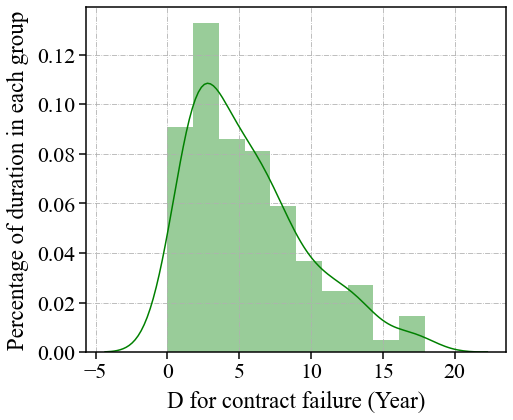

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
PPP_Contract_Failure_Remove_NA = PPP_Contract_Failure.dropna(subset=['Duration'])
sns.distplot(PPP_Contract_Failure.Duration, bins=10, color='green')

ax.grid(linestyle='-.')
ax.tick_params(axis='both', length=7, labelsize=22, width=1.5, color='black')
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
    
#ax.legend(loc=2, frameon=False, prop={'family':'times new roman', 'size':14})
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

ax.set_xlabel('D for contract failure (Year)', fontsize=23, fontname='times new roman', labelpad=8)
ax.set_ylabel('Percentage of duration in each group', fontsize=23, fontname='times new roman', labelpad=8)

plt.subplots_adjust(left=0.15, right=0.88, top=0.95, bottom=0.15)
#plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\3.png", dpi=1000)

In [9]:
#Get the active projects after 2014_07_01
#get all projects that achieve a FCY before year_end
year_threshold= pd.to_datetime(20140701,format='%Y%m%d')
PPP_Active_Threshold = PPP_Active[PPP_Active['FCY'] <= year_threshold]
#Useful data after threshold
Useful_data = pd.concat([PPP_Active_Threshold, PPP_Cancelled, PPP_Distressed, PPP_Concluded])
Useful_data.reset_index(inplace=True)
#Useful_data = new_data.drop(new_data[(new_data['status_n'] == 'Active') & (new_data['FCY'] > year_threshold)].index)
#
# project in different sectors
PPP_Energy = Useful_data[Useful_data['sector'] == 'Energy']
PPP_ICT = Useful_data[Useful_data['sector'] == 'ICT']
PPP_Waste = Useful_data[Useful_data['sector'] == 'Municipal Solid Waste']
PPP_Transport = Useful_data[Useful_data['sector'] == 'Transport']
PPP_Water = Useful_data[Useful_data['sector'] == 'Water and sewerage']

In [15]:
year_threshold

Timestamp('2014-07-01 00:00:00')

In [17]:
Useful_data.shape

(5112, 11)

In [8]:
def group_function(ppp_sector, name):
    result = ppp_sector.groupby(name)
    return result

In [9]:
from collections import Counter

def times_and_experience(dataset, parameterList):
    country_list = dataset.country.unique()
    result = []
    for cou in country_list:
        experience_country_1 = dataset[dataset.country == cou]
        experience_country_1.sort_values(by=['FCY'], inplace=True)
        experience_country_1.set_index(np.arange(1, experience_country_1.shape[0] + 1), inplace=True)
        for name in parameterList:
            if name in experience_country_1.status_n.unique():
                result.append(experience_country_1.loc[experience_country_1.status_n == name].index.values)

    result = pd.DataFrame(result)
    result_transposed = result.T
    result_list = []
    for col in np.arange(0, result_transposed.shape[1]):
        new_list = result_transposed[result_transposed.columns[col]].to_list()
        result_list.append(new_list)

    result_1 = [item for sublist in result_list for item in sublist]
    result_2 = [x for x in result_1 if str(x) != 'nan']

    result_2.sort()
    final_result = pd.DataFrame(Counter(result_2).values(), Counter(result_2).keys())
    final_result.columns = ['result']

    years = final_result.index.values.astype(int)
    input_values = final_result.result.values.astype(int)
    return years, input_values

failure_years, failure_values = times_and_experience(Useful_data, ['Cancelled', 'Distressed'])
total_years, total_values = times_and_experience(Useful_data, ['Cancelled', 'Distressed', 'Concluded', 'Active'])
Energy_failure_years, Energy_failure_values = times_and_experience(PPP_Energy, ['Cancelled', 'Distressed'])
Energy_total_years, Energy_total_values = times_and_experience(PPP_Energy, ['Cancelled', 'Distressed', 'Concluded', 'Active'])
ICT_failure_years, ICT_failure_values = times_and_experience(PPP_ICT, ['Cancelled', 'Distressed'])
ICT_total_years, ICT_total_values = times_and_experience(PPP_ICT, ['Cancelled', 'Distressed', 'Concluded', 'Active'])
Transport_failure_years, Transport_failure_values = times_and_experience(PPP_Transport, ['Cancelled', 'Distressed'])
Transport_total_years, Transport_total_values = times_and_experience(PPP_Transport, ['Cancelled', 'Distressed', 'Concluded', 'Active'])
Water_failure_years, Water_failure_values = times_and_experience(PPP_Water, ['Cancelled', 'Distressed'])
Water_total_years, Water_total_values = times_and_experience(PPP_Water, ['Cancelled', 'Distressed', 'Concluded', 'Active'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
def summary(failure_years, failure_values, total_years, total_values):
    datatrial = pd.DataFrame(failure_values, index=failure_years)
    datatrial.columns = ['column1']
    datatrial1 = pd.DataFrame(total_values, index=total_years)
    datatrial1.columns = ['column1']

    new_trial = datatrial1.merge(datatrial, how='left', left_index=True, right_index=True)
    new_trial.column1_y.fillna(0, inplace=True)
    new_trial['column1'] = new_trial.column1_x.cumsum()
    new_trial['column2'] = new_trial.column1_y.cumsum()
    new_trial['ratio'] = new_trial['column2'] / new_trial['column1']
    new_trial.columns = ['total_project', 'failed_project', 'cum_total', 'cum_failed', 'failure_rate']
    return new_trial

In [11]:
total_summary = summary(failure_years, failure_values, total_years, total_values)
energy_summary = summary(Energy_failure_years, Energy_failure_values, Energy_total_years, Energy_total_values)
energy_summary['sector'] = 0
energy_summary['times'] = energy_summary.index.values
ICT_summary = summary(ICT_failure_years, ICT_failure_values, ICT_total_years, ICT_total_values)
transport_summary = summary(Transport_failure_years, Transport_failure_values, Transport_total_years, Transport_total_values)
transport_summary['sector'] = 1
transport_summary['times'] = transport_summary.index.values
water_summary = summary(Water_failure_years, Water_failure_values, Water_total_years, Water_total_values)
water_summary['sector'] = 2
water_summary['times'] = water_summary.index.values

In [12]:
frames = [energy_summary[:200], transport_summary[:200], water_summary[:200]]
new_summary = pd.concat(frames, ignore_index=True)
new_summary

,total_project,failed_project,cum_total,cum_failed,failure_rate,sector,times
0,99,9.0,99,9.0,0.090909,0,1
1,78,9.0,177,18.0,0.101695,0,2
2,63,2.0,240,20.0,0.083333,0,3
3,52,2.0,292,22.0,0.075342,0,4
4,46,2.0,338,24.0,0.071006,0,5
...,...,...,...,...,...,...,...
595,1,0.0,622,61.0,0.098071,2,196
596,1,0.0,623,61.0,0.097913,2,197
597,1,0.0,624,61.0,0.097756,2,198
598,1,0.0,625,61.0,0.097600,2,199


In [13]:
Useful_data

,index,IY,country,Region,FCY,status_n,DSU,sector,period,countrycode,Duration
0,7,1990,Argentina,LAC,1990-09-01,Active,NaT,Transport,28.0,ARG,NaN
1,10,1990,Mexico,LAC,1990-11-01,Active,NaT,Transport,30.0,MEX,NaN
2,19,1990,Thailand,EAP,1990-12-01,Active,NaT,Transport,27.0,THA,NaN
3,24,1990,Thailand,EAP,1990-10-01,Active,2017-11-20,ICT,25.0,THA,27.138134
4,26,1990,Mexico,LAC,1990-12-01,Active,NaT,Transport,60.0,MEX,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5107,4606,2007,China,EAP,2007-10-01,Concluded,2009-10-01,Water and sewerage,3.0,CHN,2.001410
5108,4640,2007,Timor-Leste,EAP,2007-08-01,Concluded,NaT,Energy,5.0,TLS,NaN
5109,4959,2007,Sierra Leone,AFR,2007-11-01,Concluded,2010-01-01,Energy,3.0,SLE,2.168422
5110,6920,2011,Brazil,LAC,2011-08-01,Concluded,2014-12-01,Transport,5.0,BRA,3.334771


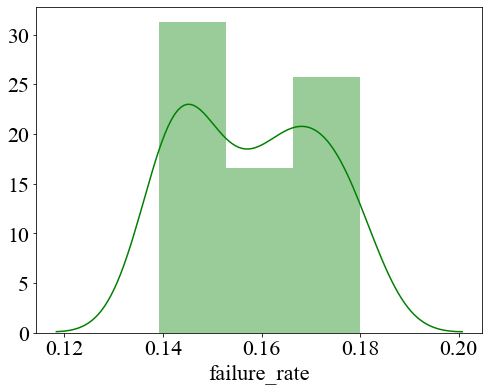

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.distplot(water_summary.failure_rate[20:60], color='green')

In [5]:
PPP_Transport.groupby('country').size().sort_values()

country
Comoros             1
Kosovo              1
Zambia              1
Liberia             1
Macedonia, FYR      1
                 ... 
Argentina          83
Mexico            112
Brazil            152
China             210
India             433
Length: 79, dtype: int64

In [16]:
Useful_data.sort_values(by=['sector', 'FCY'], inplace=True)
Useful_data.reset_index(inplace=True, drop=True)

In [17]:
PPP_Energy.groupby('country').size()

country
Afghanistan            1
Albania               11
Algeria                7
Angola                 6
Argentina             69
                      ..
Venezuela, RB          1
Vietnam               64
West Bank and Gaza     1
Yemen, Rep.            2
Zambia                 3
Length: 99, dtype: int64

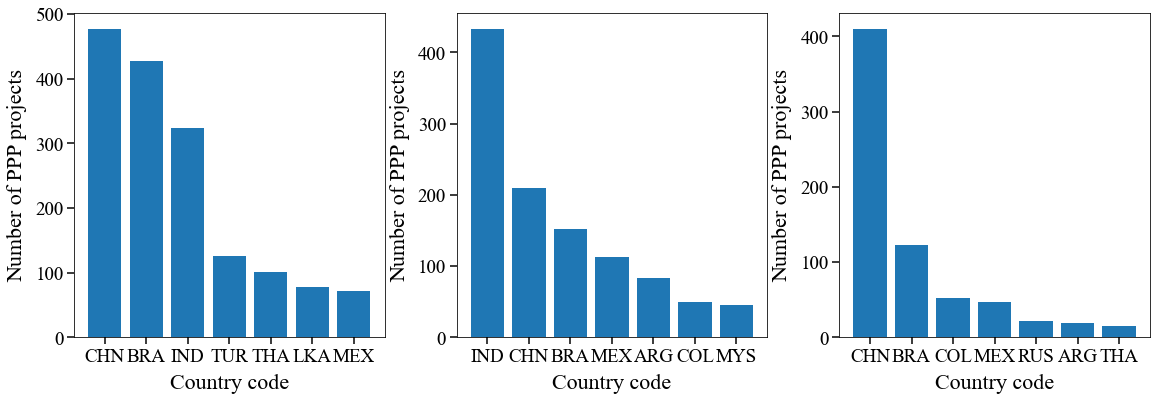

In [18]:
top_ten_energy = PPP_Energy.groupby('countrycode').size().sort_values(ascending=False).head(7).to_frame()
top_ten_energy.columns = ['number']
top_ten_transport = PPP_Transport.groupby('countrycode').size().sort_values(ascending=False).head(7).to_frame()
top_ten_transport.columns = ['number']
top_ten_water = PPP_Water.groupby('countrycode').size().sort_values(ascending=False).head(7).to_frame()
top_ten_water.columns = ['number']

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18, 6))
fig.tight_layout(pad=1.2)
ax[0].bar(top_ten_energy.index.values, top_ten_energy.number)
ax[0].set_xlabel('Country code', fontsize=22, fontname='times new roman', labelpad=8)
ax[0].set_ylabel('Number of PPP projects', fontsize=22, fontname='times new roman', labelpad=8)

ax[1].bar(top_ten_transport.index.values, top_ten_transport.number)
ax[1].set_xlabel('Country code', fontsize=22, fontname='times new roman', labelpad=8)
ax[1].set_ylabel('Number of PPP projects', fontsize=22, fontname='times new roman', labelpad=8)

ax[2].bar(top_ten_water.index.values, top_ten_water.number)
ax[2].set_xlabel('Country code', fontsize=22, fontname='times new roman', labelpad=8)
ax[2].set_ylabel('Number of PPP projects', fontsize=22, fontname='times new roman', labelpad=8)

for subplot in ax:
    subplot.tick_params(axis='both', length=7, labelsize=19, width=1.5, color='black')
    
    labels = subplot.get_xticklabels() + subplot.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]


plt.subplots_adjust(left=0.12, right=0.95, top=0.95, bottom=0.2)
#plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\18.png", dpi=1000)

In [14]:
PPP_Water.groupby('country').size().sort_values()

country
Kyrgyz Republic               1
Haiti                         1
Honduras                      1
Kenya                         1
Kosovo                        1
Lebanon                       1
Mauritius                     1
Montenegro                    1
Guyana, CR                    1
Namibia                       1
Niger                         1
Papua New Guinea              1
Serbia                        1
Sudan                         1
Tanzania                      1
Tunisia                       1
Uzbekistan                    1
Nepal                         1
Guatemala                     1
Zambia                        1
Gambia, The                   1
Central African Republic      1
Azerbaijan                    1
Cameroon                      1
Cuba                          1
Côte d'Ivoire                 1
Bulgaria                      1
Gabon                         1
Turkey                        2
Uganda                        2
Ukraine                       2


In [115]:
energy_summary[:125].to_csv(r"C:\PPP\Thesis\Database\CSV format data by python\energy_summary.csv")
#120.298856  12.430704  12.139394   5.670348   4.322137   4.322137   1.659800   1.531947

In [116]:
transport_summary[:112].to_csv(r"C:\PPP\Thesis\Database\CSV format data by python\transport_summary.csv")
#41.925465 28.015942 14.876647 14.876647 14.074438 13.114984  1.730787  1.584154

In [117]:
water_summary[:122].to_csv(r"C:\PPP\Thesis\Database\CSV format data by python\water_summary.csv")
#8.845347 7.947063 2.686420 2.686420 2.686420 2.686420 2.440631 2.324083

<Figure size 432x288 with 0 Axes>

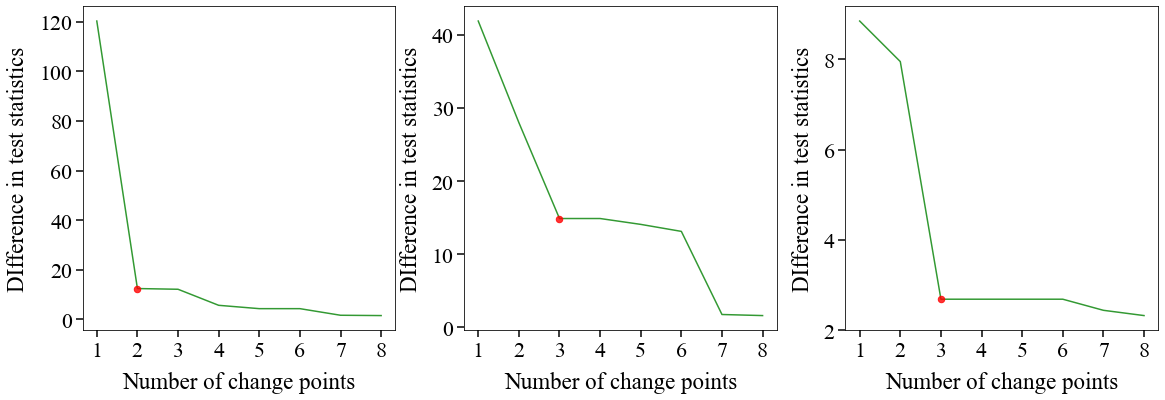

In [4]:
from matplotlib.ticker import MaxNLocator
plt.rcParams['axes.titlepad'] = 8

plt.subplots_adjust(left=0.21, right=0.91, top=0.92, bottom=0.12)
energy = [120.298856, 12.430704, 12.139394, 5.670348, 4.322137, 4.322137, 1.659800, 1.531947]
transport = [41.925465, 28.015942, 14.876647, 14.876647, 14.074438, 13.114984, 1.730787, 1.584154]
water = [8.845347, 7.947063, 2.686420, 2.686420, 2.686420, 2.686420, 2.440631, 2.324083]

all_data_set = {
    'energy': energy,
    'transport': transport,
    'water': water
}
X = np.arange(1, 9)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, failure_rate in enumerate(all_data_set):
    ax[i].plot(X, all_data_set[failure_rate], color='green', alpha=0.8)
    labels = ax[i].get_xticklabels() + ax[i].get_yticklabels()
    [label.set_fontname('times new roman') for label in labels]
    ax[i].tick_params(axis='both', length=7, labelsize=22, color='black', width=1.5)
    ax[i].title.set_fontsize(23)
    ax[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[i].set_xlabel("Number of change points", fontsize=23, fontname='times new roman', labelpad=10)
    ax[i].set_ylabel("DIfference in test statistics", fontsize=23, fontname='times new roman', labelpad=10)

    
fig.tight_layout(pad=1.2)
plt.subplots_adjust(left=0.12, right=0.95, top=0.95, bottom=0.2)

ax[0].plot(2, 12.430704, '.', markersize=13, alpha=0.8, c='red')
ax[1].plot(3, 14.876647, '.', markersize=13, alpha=0.8, c='red')
ax[2].plot(3, 2.686420, '.', markersize=13, alpha=0.8, c='red')
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\30.png", dpi=1000)

In [15]:
group_function(PPP_Energy, 'status_n').size()

status_n
Active        2454
Cancelled       52
Concluded       59
Distressed      30
dtype: int64

In [16]:
group_function(PPP_ICT, 'status_n').size()

status_n
Active        94
Cancelled     16
Concluded      6
Distressed     3
dtype: int64

In [17]:
group_function(PPP_Waste, 'status_n').size()

status_n
Active    100
dtype: int64

In [18]:
group_function(PPP_Transport, 'status_n').size()
PPP_Transport.groupby('country').size().sort_values()

country
Comoros             1
Kosovo              1
Zambia              1
Liberia             1
Macedonia, FYR      1
                 ... 
Argentina          83
Mexico            112
Brazil            152
China             210
India             433
Length: 79, dtype: int64

In [19]:
group_function(PPP_Energy, 'country').size().sort_values().head(20)

country
Afghanistan               1
Guinea                    1
Kosovo                    1
Gambia, The               1
Lesotho                   1
Fiji                      1
Malawi                    1
Mongolia                  1
Congo, Rep.               1
Comoros                   1
Papua New Guinea          1
Guinea-Bissau             1
Cape Verde                1
Burkina Faso              1
Chad                      1
Botswana                  1
West Bank and Gaza        1
Bosnia and Herzegovina    1
Venezuela, RB             1
Belarus                   1
dtype: int64

In [282]:
np.random.seed(0)
X = energy_summary.index.values.astype(int)[:125]
Y = energy_summary.failure_rate.values[:125] * 100

with pm.Model() as disaster_model:

    switchpoint1 = pm.DiscreteUniform('change point 1', lower=X.min(), upper=50)#20
    switchpoint2 = pm.DiscreteUniform('change point 2', switchpoint1, upper=X.max())#350
    
    
    mu_1 = pm.Uniform('mu 1', 0, 10)#8， 10
    mu_2 = pm.Uniform('mu 2', 0, 10)#6， 8
    mu_3 = pm.Uniform('mu 3', 0, 10)#4， 6

    
    mu_a = pm.math.switch(switchpoint1 >= X, mu_1, mu_2)    
    mu = pm.math.switch(switchpoint2 >= X, mu_a, mu_3)
    

    #sigma
    sigma_1 = pm.HalfNormal('sigma 1', 6)
    sigma_2 = pm.HalfNormal('sigma 2', 6)
    sigma_3 = pm.HalfNormal('sigma 3', 6)
    
    sigma_a = pm.math.switch(switchpoint1 >= X, sigma_1, sigma_2)    
    sigma = pm.math.switch(switchpoint2 >= X, sigma_a, sigma_3)

    disasters = pm.Normal('disasters', mu, sigma, observed=Y)

with disaster_model:
    trace = pm.sample(4000, chains=3, tune=1800)

Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [change point 2]
>>Metropolis: [change point 1]
>NUTS: [sigma 3, sigma 2, sigma 1, mu 3, mu 2, mu 1]
Sampling 3 chains, 0 divergences: 100%|█| 17400/17400 [00:43<00:00, 402.60draws/s] 
The number of effective samples is smaller than 10% for some parameters.


C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\A

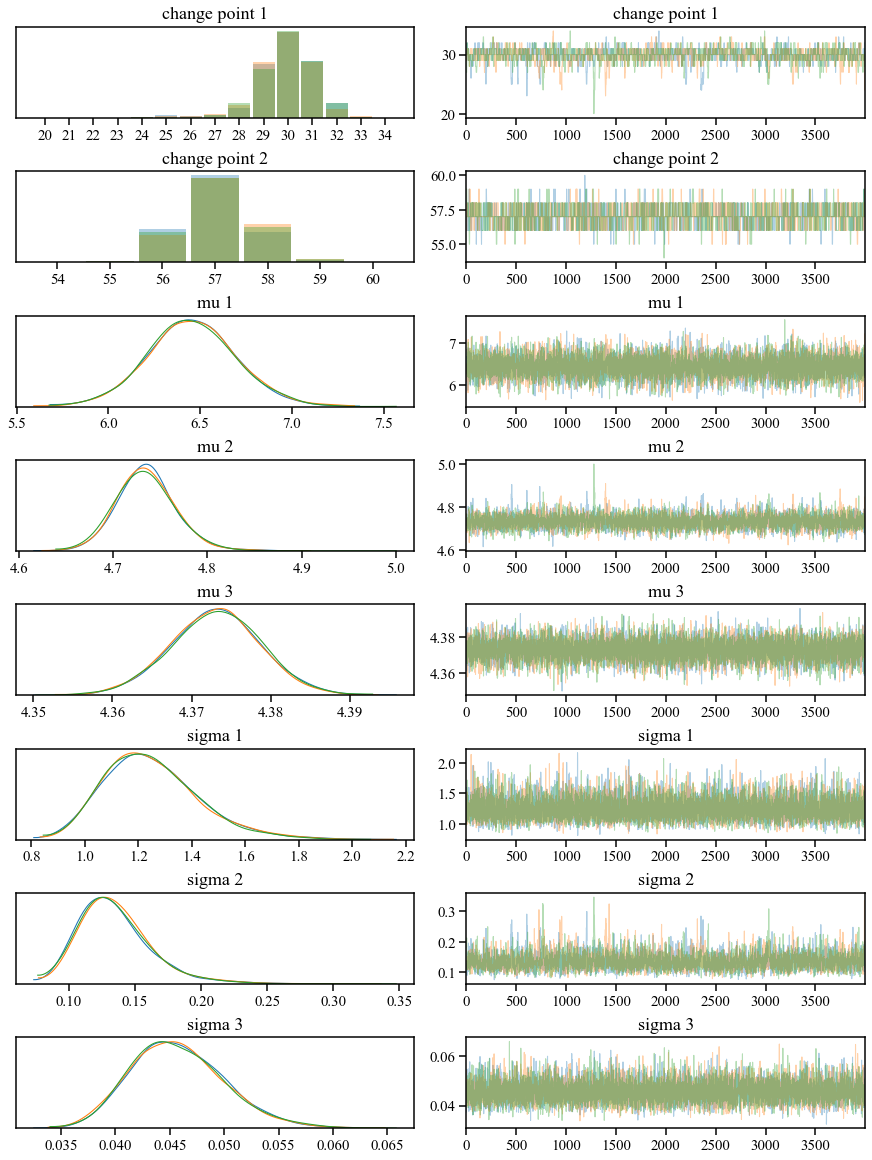

In [244]:
axes = pm.traceplot(trace)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.titlepad'] = 8

for axlist in axes:
    for ax in axlist:
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]
        ax.tick_params(axis='both', length=7, labelsize=15, width=1.5)
        ax.title.set_fontsize(18)
        
        ax.spines["top"].set_linewidth(1.5)
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(1.5)
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\7_energy.png", dpi=1000)

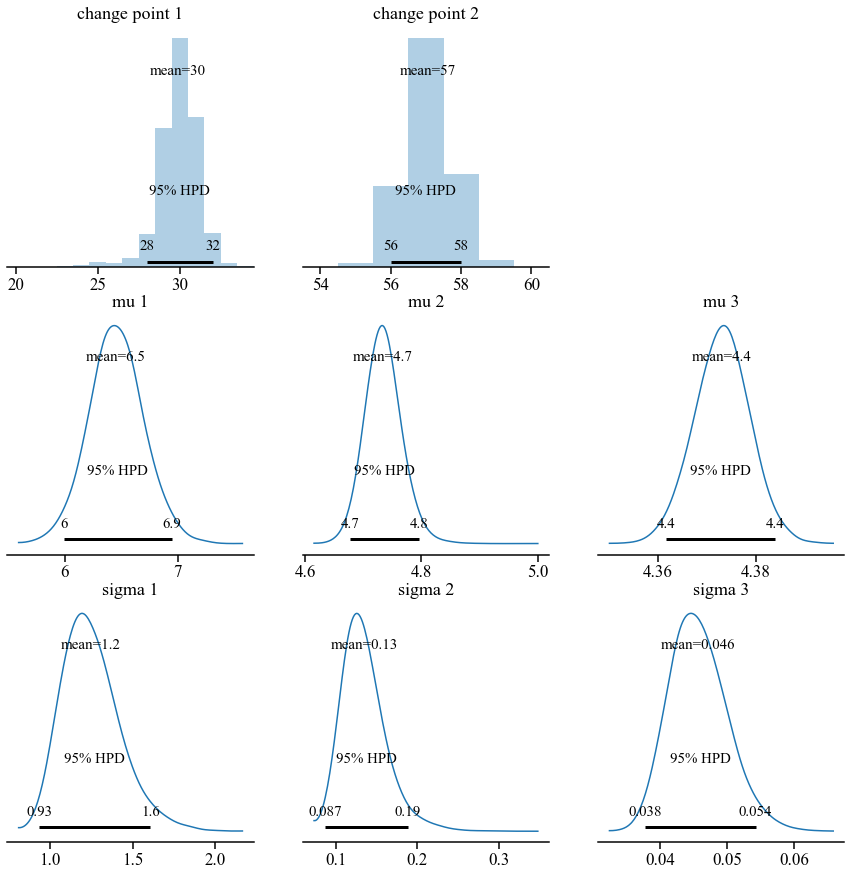

In [245]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

pm.plot_posterior(trace, var_names=['change point 1'], ax=ax[0, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['change point 2'], ax=ax[0, 1], credible_interval=0.95)

pm.plot_posterior(trace, var_names=['mu 1'], ax=ax[1, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 2'], ax=ax[1, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 3'], ax=ax[1, 2], credible_interval=0.95)

pm.plot_posterior(trace, var_names=['sigma 1'], ax=ax[2, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 2'], ax=ax[2, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 3'], ax=ax[2, 2], credible_interval=0.95)

for subplots in ax:
    for subplot in subplots:
        labels = subplot.get_xticklabels() + subplot.get_yticklabels()
        [label.set_fontname('times new roman') for label in labels]
        subplot.tick_params(axis='x', length=7, labelsize=17, color='black', width=1.5)
        subplot.title.set_fontsize(18)
        subplot.spines["bottom"].set_color("black")
        subplot.spines["bottom"].set_linewidth(1.5)
ax[0, 2].axis("off")
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\8_energy.png", dpi=1000)

In [241]:
pm.rhat(trace)

<xarray.Dataset>
Dimensions:         ()
Data variables:
    change point 1  float64 1.002
    change point 2  float64 1.002
    mu 1            float64 1.0
    mu 2            float64 1.0
    mu 3            float64 1.001
    sigma 1         float64 0.9999
    sigma 2         float64 1.001
    sigma 3         float64 1.0

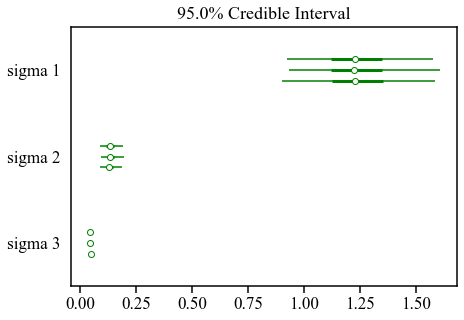

In [249]:
fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.5))
plt.rcParams['axes.titlepad'] = 8
pm.forestplot(trace, colors='green', var_names=['sigma 1', 'sigma 2', 'sigma 3'], markersize=8, ax=subplot, credible_interval=0.95)


labels = subplot.get_xticklabels() + subplot.get_yticklabels()
[label.set_fontname('times new roman') for label in labels]
subplot.tick_params(axis='both', length=7, labelsize=17, color='black', width=1.5)
subplot.title.set_fontsize(18)
subplot.spines["bottom"].set_color("black")
subplot.spines["bottom"].set_linewidth(1.5)
subplot.spines["top"].set_color("black")
subplot.spines["top"].set_linewidth(1.5)
subplot.spines['left'].set_visible(True)
subplot.spines["left"].set_color("black")
subplot.spines["left"].set_linewidth(1.5)
subplot.spines['right'].set_visible(True)
subplot.spines["right"].set_color("black")
subplot.spines["right"].set_linewidth(1.5)

plt.subplots_adjust(left=0.21, right=0.88, top=0.92, bottom=0.12)

plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\9_energy_sigma.png", dpi=1000)

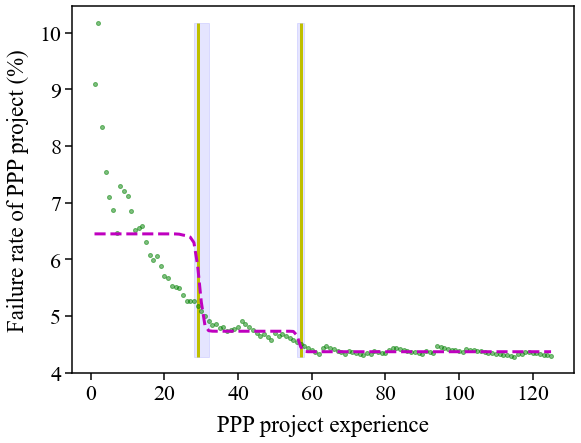

In [284]:
fig, ax = plt.subplots(figsize=(9, 6.75))
ax.plot(X, Y, '.', markersize=8, c='green', alpha=0.5)

ax.set_ylabel("Failure rate of PPP project (%)", fontsize=23, fontname='times new roman', labelpad=10)
ax.set_xlabel("PPP project experience", fontsize=23, fontname='times new roman', labelpad=10)

ax.vlines(trace['change point 1'].mean().astype(int), Y.min(), Y.max(), color='y', linewidth=3)
ax.vlines(trace['change point 2'].mean().astype(int), Y.min(), Y.max(), color='y', linewidth=3)

average_failures = np.zeros_like(Y, dtype='float')

for i, year in enumerate(X):
    idx1 = year < trace['change point 1']
    idx2 = (year >= trace['change point 1']) & (year < trace['change point 2'])
    idx3 = year >= trace['change point 2']
    
    average_failures[i] = (trace['mu 1'][idx1].sum() + 
                           trace['mu 2'][idx2].sum() + 
                           trace['mu 3'][idx3].sum()) / (len(trace) * trace.nchains)

sp_hpd1 = pm.hpd(trace['change point 1'])
sp_hpd2 = pm.hpd(trace['change point 2'])

plt.fill_betweenx(y=[Y.min(), Y.max()],
                  x1=sp_hpd1[0], x2=sp_hpd1[1], alpha=0.1, color='b')
plt.fill_betweenx(y=[Y.min(), Y.max()],
                  x1=sp_hpd2[0], x2=sp_hpd2[1], alpha=0.1, color='b')

labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('times new roman') for label in labels]
ax.tick_params(axis='both', length=7, labelsize=22, color='black', width=1.5)

ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(1.5)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_color("black")
ax.spines["right"].set_linewidth(1.5)

    
ax.plot(X, average_failures,'m--', lw=3)
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\10_energy.png", dpi=1000)

In [271]:
np.random.seed(0)
X = transport_summary.index.values.astype(int)[:112]
Y = transport_summary.failure_rate.values[:112] * 100

with pm.Model() as disaster_model:

    switchpoint1 = pm.DiscreteUniform('change point 1', lower=X.min(), upper=30)#30
    switchpoint2 = pm.DiscreteUniform('change point 2', switchpoint1, upper=X.max())
    switchpoint3 = pm.DiscreteUniform('change point 3', 65, upper=X.max())#65
    
    
    mu_1 = pm.Uniform('mu 1', 0, 20)#8， 10
    mu_2 = pm.Uniform('mu 2', 0, 20)#6， 8
    mu_3 = pm.Uniform('mu 3', 0, 20)#4， 6
    mu_4 = pm.Uniform('mu 4', 0, 20)#4， 6

    
    mu_a = pm.math.switch(switchpoint1 >= X, mu_1, mu_2)    
    mu_b = pm.math.switch(switchpoint2 >= X, mu_a, mu_3)   
    mu = pm.math.switch(switchpoint3 >= X, mu_b, mu_4)
    

    #sigma
    sigma_1 = pm.HalfNormal('sigma 1', 6)
    sigma_2 = pm.HalfNormal('sigma 2', 6)
    sigma_3 = pm.HalfNormal('sigma 3', 6)
    sigma_4 = pm.HalfNormal('sigma 4', 6)
    
    sigma_a = pm.math.switch(switchpoint1 >= X, sigma_1, sigma_2)    
    sigma_b = pm.math.switch(switchpoint2 >= X, sigma_a, sigma_3)  
    sigma = pm.math.switch(switchpoint3 >= X, sigma_b, sigma_4)

    disasters = pm.Normal('disasters', mu, sigma, observed=Y)

with disaster_model:
    trace = pm.sample(4100, chains=3, tune=2500)

Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [change point 3]
>>Metropolis: [change point 2]
>>Metropolis: [change point 1]
>NUTS: [sigma 4, sigma 3, sigma 2, sigma 1, mu 4, mu 3, mu 2, mu 1]
Sampling 3 chains, 0 divergences: 100%|█| 19800/19800 [00:43<00:00, 458.97draws/s] 
The number of effective samples is smaller than 10% for some parameters.


In [23]:
import pymc3 as pm

In [26]:
## test
np.random.seed(0)
X = transport_summary.index.values.astype(int)[:112]
Y = transport_summary.failure_rate.values[:112] * 100

with pm.Model() as disaster_model:

    switchpoint1 = pm.DiscreteUniform('change point 1', lower=X.min(), upper=X.max())#30
    switchpoint2 = pm.DiscreteUniform('change point 2', switchpoint1, upper=X.max())
    switchpoint3 = pm.DiscreteUniform('change point 3', switchpoint2, upper=X.max())#65
    
    
    mu_1 = pm.Uniform('mu 1', 0, 20)#8， 10
    mu_2 = pm.Uniform('mu 2', 0, 20)#6， 8
    mu_3 = pm.Uniform('mu 3', 0, 20)#4， 6
    mu_4 = pm.Uniform('mu 4', 0, 20)#4， 6

    
    mu_a = pm.math.switch(switchpoint1 >= X, mu_1, mu_2)    
    mu_b = pm.math.switch(switchpoint2 >= X, mu_a, mu_3)   
    mu = pm.math.switch(switchpoint3 >= X, mu_b, mu_4)
    

    #sigma
    sigma_1 = pm.HalfNormal('sigma 1', 6)
    sigma_2 = pm.HalfNormal('sigma 2', 6)
    sigma_3 = pm.HalfNormal('sigma 3', 6)
    sigma_4 = pm.HalfNormal('sigma 4', 6)
    
    sigma_a = pm.math.switch(switchpoint1 >= X, sigma_1, sigma_2)    
    sigma_b = pm.math.switch(switchpoint2 >= X, sigma_a, sigma_3)  
    sigma = pm.math.switch(switchpoint3 >= X, sigma_b, sigma_4)

    disasters = pm.Normal('disasters', mu, sigma, observed=Y)

with disaster_model:
    trace = pm.sample(4100, chains=3, tune=2500)

INFO (theano.gof.compilelock): Refreshing lock C:\Users\Meghdad\AppData\Local\Theano\compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock
Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [change point 3]
>>Metropolis: [change point 2]
>>Metropolis: [change point 1]
>NUTS: [sigma 4, sigma 3, sigma 2, sigma 1, mu 4, mu 3, mu 2, mu 1]
Sampling 3 chains, 0 divergences: 100%|█| 19800/19800 [00:42<00:00, 468.97draws/s] 
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Meghdad\AppData\Local\Theano\compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_94_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock
WARNING (theano.gof.compilelock): Refreshing lock failed, we release the lock before raising again the exception
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{20.0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (the

C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\A

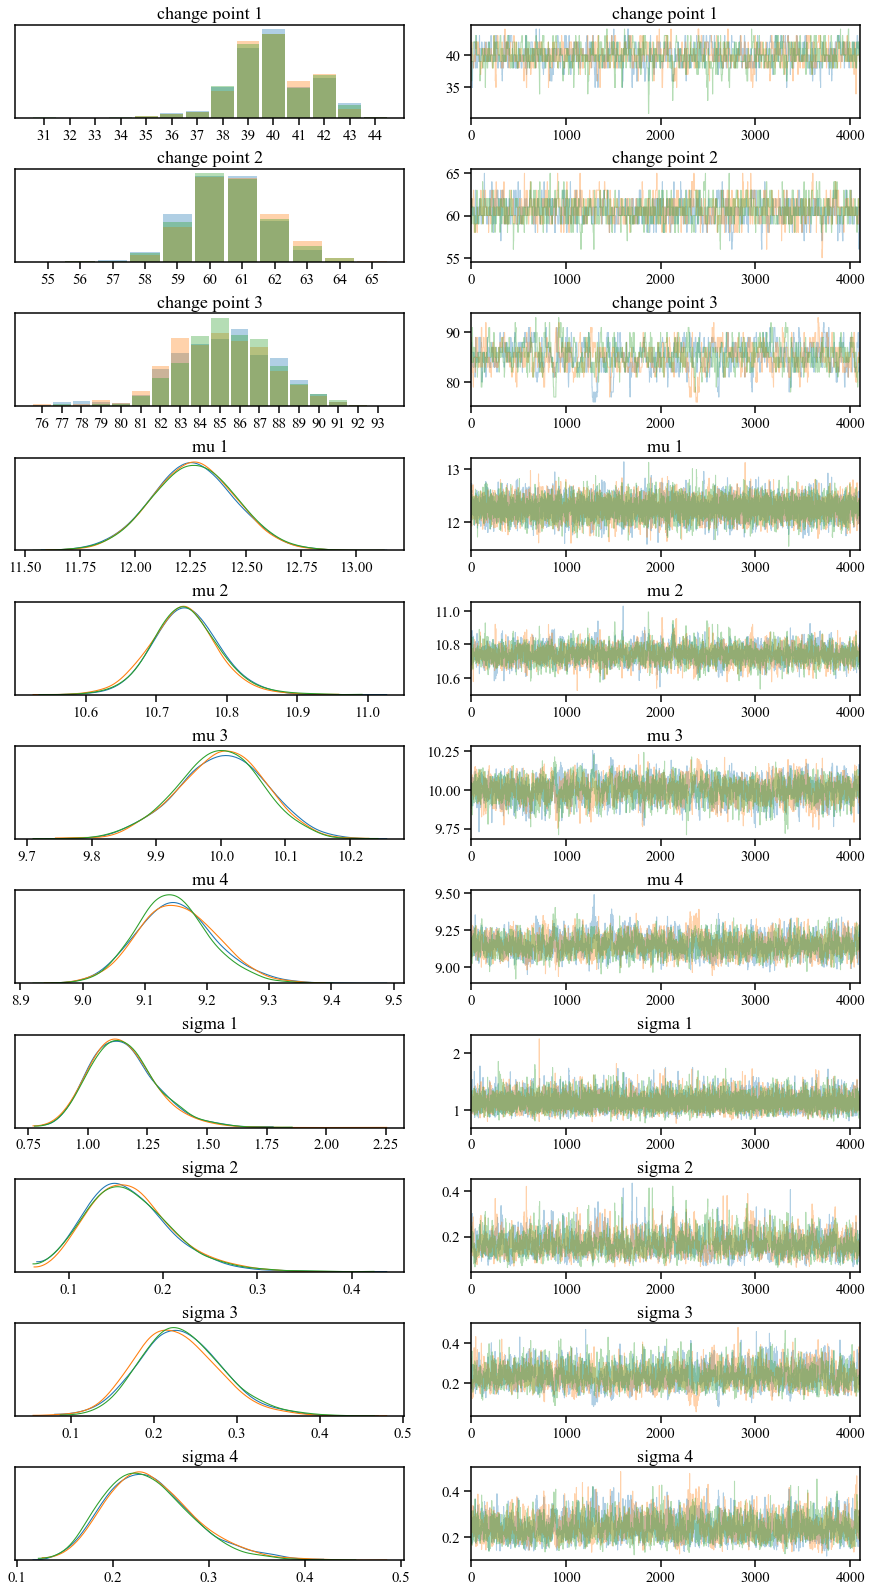

In [27]:
### test
axes = pm.traceplot(trace)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.titlepad'] = 8

for axlist in axes:
    for ax in axlist:
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]
        ax.tick_params(axis='both', length=7, labelsize=15, width=1.5)
        ax.title.set_fontsize(18)
        
        ax.spines["top"].set_linewidth(1.5)
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(1.5)

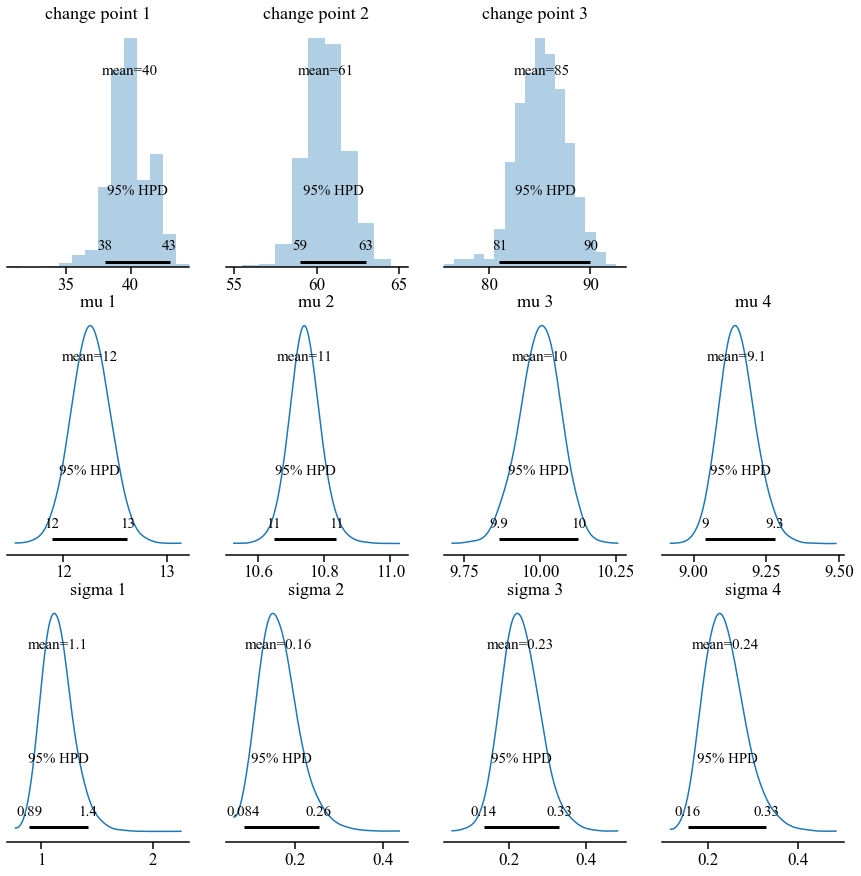

In [29]:
###test
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

pm.plot_posterior(trace, var_names=['change point 1'], ax=ax[0, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['change point 2'], ax=ax[0, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['change point 3'], ax=ax[0, 2], credible_interval=0.95)

pm.plot_posterior(trace, var_names=['mu 1'], ax=ax[1, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 2'], ax=ax[1, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 3'], ax=ax[1, 2], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 4'], ax=ax[1, 3], credible_interval=0.95)

pm.plot_posterior(trace, var_names=['sigma 1'], ax=ax[2, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 2'], ax=ax[2, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 3'], ax=ax[2, 2], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 4'], ax=ax[2, 3], credible_interval=0.95)

for subplots in ax:
    for subplot in subplots:
        labels = subplot.get_xticklabels() + subplot.get_yticklabels()
        [label.set_fontname('times new roman') for label in labels]
        subplot.tick_params(axis='x', length=7, labelsize=17, color='black', width=1.5)
        subplot.title.set_fontsize(18)
        subplot.spines["bottom"].set_color("black")
        subplot.spines["bottom"].set_linewidth(1.5)
ax[0, 3].axis("off")
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\100_transport.png", dpi=1000)

C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\A

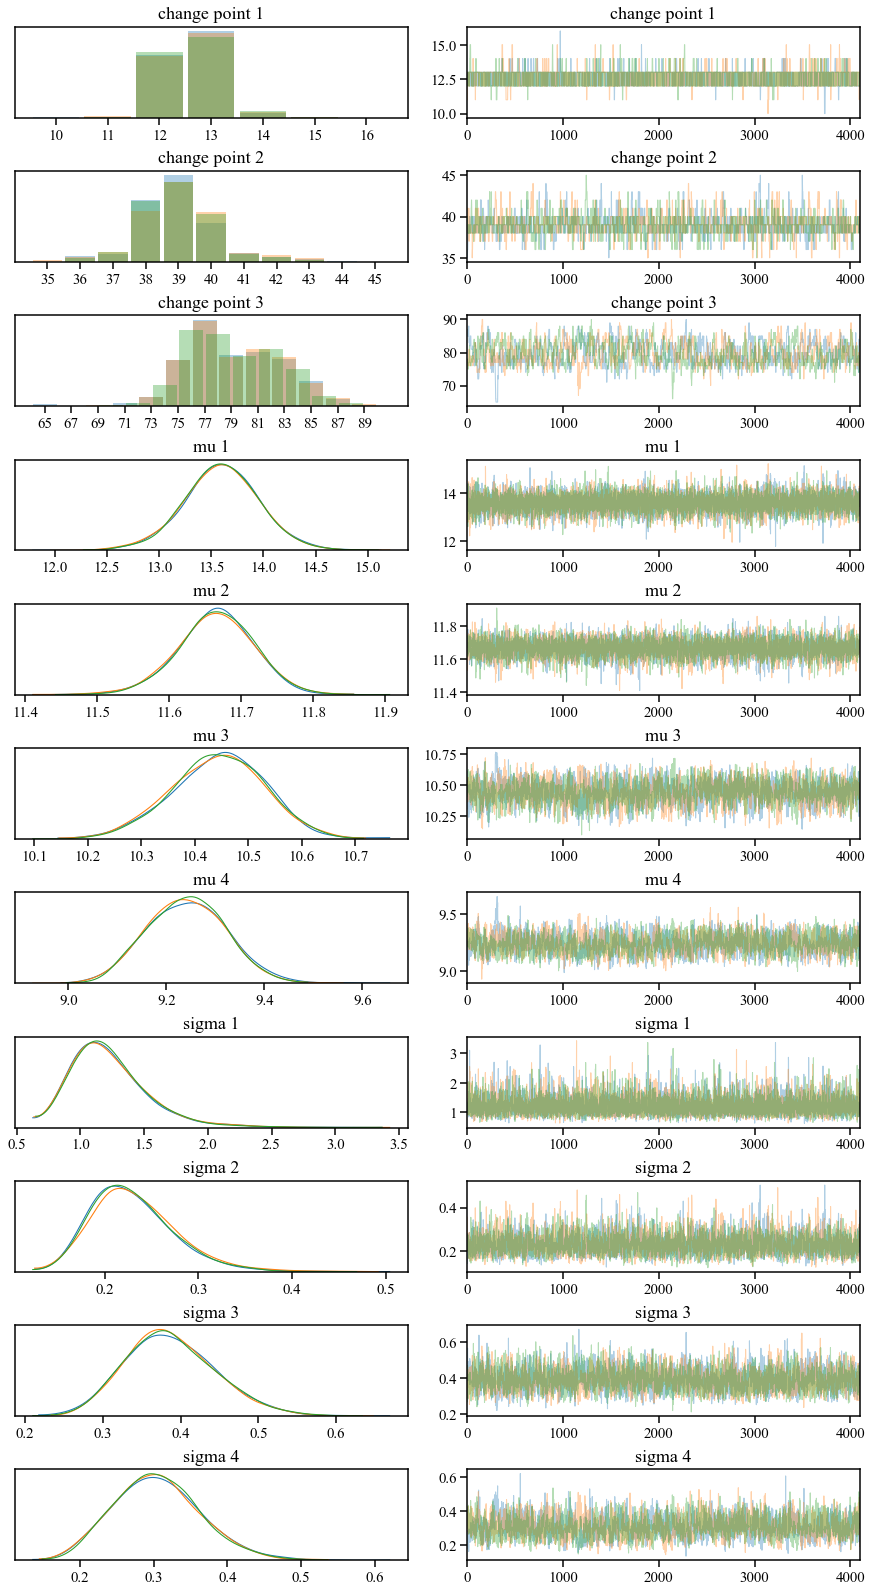

In [251]:
axes = pm.traceplot(trace)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.titlepad'] = 8

for axlist in axes:
    for ax in axlist:
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]
        ax.tick_params(axis='both', length=7, labelsize=15, width=1.5)
        ax.title.set_fontsize(18)
        
        ax.spines["top"].set_linewidth(1.5)
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(1.5)
#plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\7_transport.png", dpi=1000)

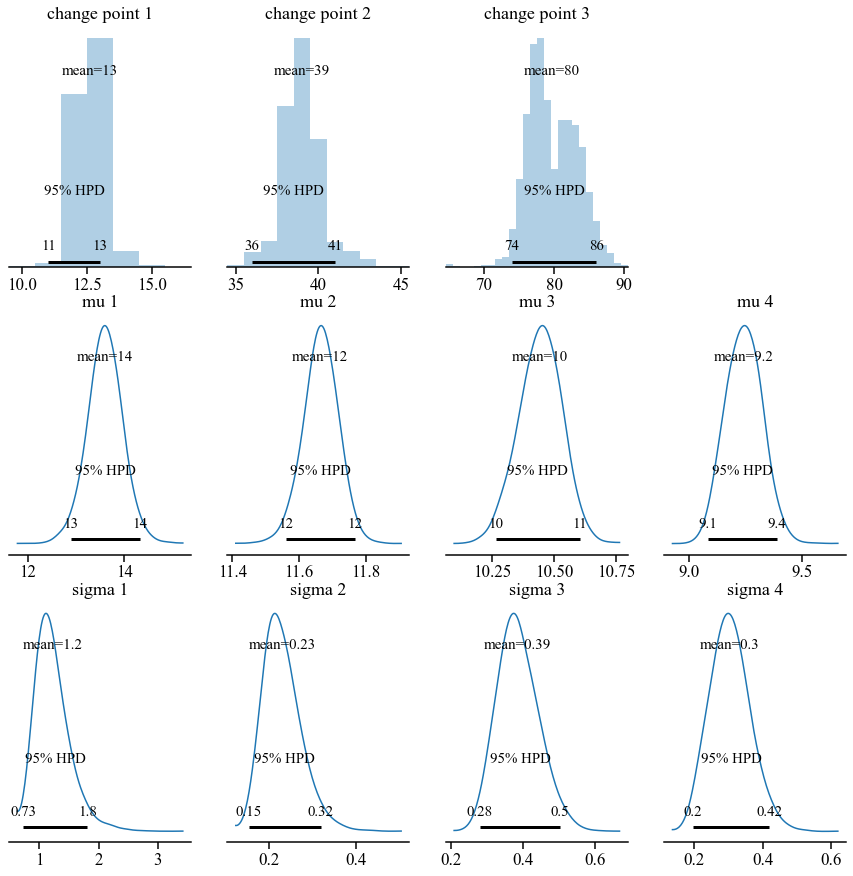

In [252]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

pm.plot_posterior(trace, var_names=['change point 1'], ax=ax[0, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['change point 2'], ax=ax[0, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['change point 3'], ax=ax[0, 2], credible_interval=0.95)

pm.plot_posterior(trace, var_names=['mu 1'], ax=ax[1, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 2'], ax=ax[1, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 3'], ax=ax[1, 2], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 4'], ax=ax[1, 3], credible_interval=0.95)

pm.plot_posterior(trace, var_names=['sigma 1'], ax=ax[2, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 2'], ax=ax[2, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 3'], ax=ax[2, 2], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 4'], ax=ax[2, 3], credible_interval=0.95)

for subplots in ax:
    for subplot in subplots:
        labels = subplot.get_xticklabels() + subplot.get_yticklabels()
        [label.set_fontname('times new roman') for label in labels]
        subplot.tick_params(axis='x', length=7, labelsize=17, color='black', width=1.5)
        subplot.title.set_fontsize(18)
        subplot.spines["bottom"].set_color("black")
        subplot.spines["bottom"].set_linewidth(1.5)
ax[0, 3].axis("off")
#plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\8_transport.png", dpi=1000)

In [253]:
pm.rhat(trace)

<xarray.Dataset>
Dimensions:         ()
Data variables:
    change point 1  float64 1.002
    change point 2  float64 1.002
    change point 3  float64 1.016
    mu 1            float64 1.0
    mu 2            float64 1.001
    mu 3            float64 1.01
    mu 4            float64 1.009
    sigma 1         float64 1.0
    sigma 2         float64 1.002
    sigma 3         float64 1.005
    sigma 4         float64 1.01

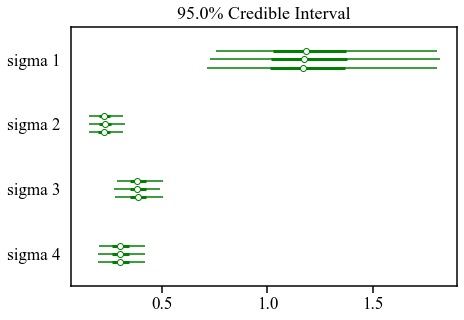

In [257]:
fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.5))
plt.rcParams['axes.titlepad'] = 8
pm.forestplot(trace, colors='green', var_names=['sigma 1', 'sigma 2', 'sigma 3', 'sigma 4'], markersize=8, ax=subplot, credible_interval=0.95)


labels = subplot.get_xticklabels() + subplot.get_yticklabels()
[label.set_fontname('times new roman') for label in labels]
subplot.tick_params(axis='both', length=7, labelsize=17, color='black', width=1.5)
subplot.title.set_fontsize(18)
subplot.spines["bottom"].set_color("black")
subplot.spines["bottom"].set_linewidth(1.5)
subplot.spines["top"].set_color("black")
subplot.spines["top"].set_linewidth(1.5)
subplot.spines['left'].set_visible(True)
subplot.spines["left"].set_color("black")
subplot.spines["left"].set_linewidth(1.5)
subplot.spines['right'].set_visible(True)
subplot.spines["right"].set_color("black")
subplot.spines["right"].set_linewidth(1.5)

plt.subplots_adjust(left=0.21, right=0.88, top=0.92, bottom=0.12)

plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\9_transport_sigma.png", dpi=1000)

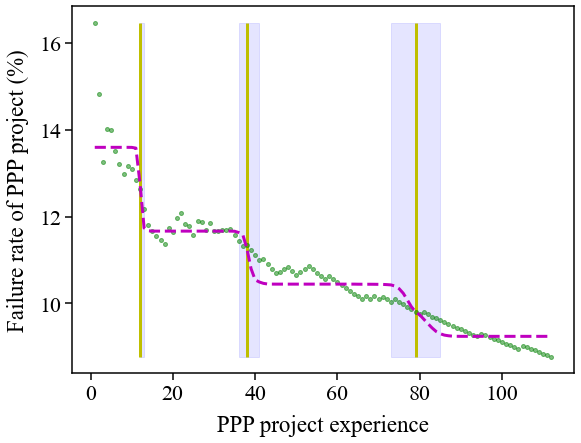

In [274]:
fig, ax = plt.subplots(figsize=(9, 6.75))
ax.plot(X, Y, '.', markersize=8, c='green', alpha=0.5)

ax.set_ylabel("Failure rate of PPP project (%)", fontsize=23, fontname='times new roman', labelpad=10)
ax.set_xlabel("PPP project experience", fontsize=23, fontname='times new roman', labelpad=10)

ax.vlines(trace['change point 1'].mean().astype(int), Y.min(), Y.max(), color='y', linewidth=3)
ax.vlines(trace['change point 2'].mean().astype(int), Y.min(), Y.max(), color='y', linewidth=3)
ax.vlines(trace['change point 3'].mean().astype(int), Y.min(), Y.max(), color='y', linewidth=3)

average_failures = np.zeros_like(Y, dtype='float')

for i, year in enumerate(X):
    idx1 = year < trace['change point 1']
    idx2 = (year >= trace['change point 1']) & (year < trace['change point 2'])
    idx3 = (year >= trace['change point 2']) & (year < trace['change point 3'])
    idx4 = year >= trace['change point 3']
    
    average_failures[i] = (trace['mu 1'][idx1].sum() + 
                           trace['mu 2'][idx2].sum() + 
                           trace['mu 3'][idx3].sum() + 
                           trace['mu 4'][idx4].sum()) / (len(trace) * trace.nchains)

sp_hpd1 = pm.hpd(trace['change point 1'])
sp_hpd2 = pm.hpd(trace['change point 2'])
sp_hpd3 = pm.hpd(trace['change point 3'])

plt.fill_betweenx(y=[Y.min(), Y.max()],
                  x1=sp_hpd1[0], x2=sp_hpd1[1], alpha=0.1, color='b')
plt.fill_betweenx(y=[Y.min(), Y.max()],
                  x1=sp_hpd2[0], x2=sp_hpd2[1], alpha=0.1, color='b')
plt.fill_betweenx(y=[Y.min(), Y.max()],
                  x1=sp_hpd3[0], x2=sp_hpd3[1], alpha=0.1, color='b')

labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('times new roman') for label in labels]
ax.tick_params(axis='both', length=7, labelsize=22, color='black', width=1.5)

ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(1.5)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_color("black")
ax.spines["right"].set_linewidth(1.5)

    
ax.plot(X, average_failures,'m--', lw=3)
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\10_transport.png", dpi=1000)

In [279]:
np.random.seed(0)
X = water_summary.index.values.astype(int)[:122]
Y = water_summary.failure_rate.values[:122] * 100

with pm.Model() as disaster_model:

    switchpoint1 = pm.DiscreteUniform('change point 1', lower=7, upper=25)#30
    switchpoint2 = pm.DiscreteUniform('change point 2', switchpoint1, upper=X.max())
    switchpoint3 = pm.DiscreteUniform('change point 3', switchpoint2, upper=X.max())
    
    
    mu_1 = pm.Uniform('mu 1', 0, 20)#8， 10
    mu_2 = pm.Uniform('mu 2', 0, 20)#6， 8
    mu_3 = pm.Uniform('mu 3', 0, 20)#4， 6
    mu_4 = pm.Uniform('mu 4', 0, 20)#4， 6

    
    mu_a = pm.math.switch(switchpoint1 >= X, mu_1, mu_2)    
    mu_b = pm.math.switch(switchpoint2 >= X, mu_a, mu_3)   
    mu = pm.math.switch(switchpoint3 >= X, mu_b, mu_4)
    

    #sigma
    sigma_1 = pm.HalfNormal('sigma 1', 6)
    sigma_2 = pm.HalfNormal('sigma 2', 6)
    sigma_3 = pm.HalfNormal('sigma 3', 6)
    sigma_4 = pm.HalfNormal('sigma 4', 6)
    
    sigma_a = pm.math.switch(switchpoint1 >= X, sigma_1, sigma_2)    
    sigma_b = pm.math.switch(switchpoint2 >= X, sigma_a, sigma_3)  
    sigma = pm.math.switch(switchpoint3 >= X, sigma_b, sigma_4)

    disasters = pm.Normal('disasters', mu, sigma, observed=Y)

with disaster_model:
    trace = pm.sample(4000, chains=3, tune=2300)

Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [change point 3]
>>Metropolis: [change point 2]
>>Metropolis: [change point 1]
>NUTS: [sigma 4, sigma 3, sigma 2, sigma 1, mu 4, mu 3, mu 2, mu 1]
Sampling 3 chains, 0 divergences: 100%|█| 18900/18900 [00:41<00:00, 458.23draws/s] 
The number of effective samples is smaller than 10% for some parameters.


C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\A

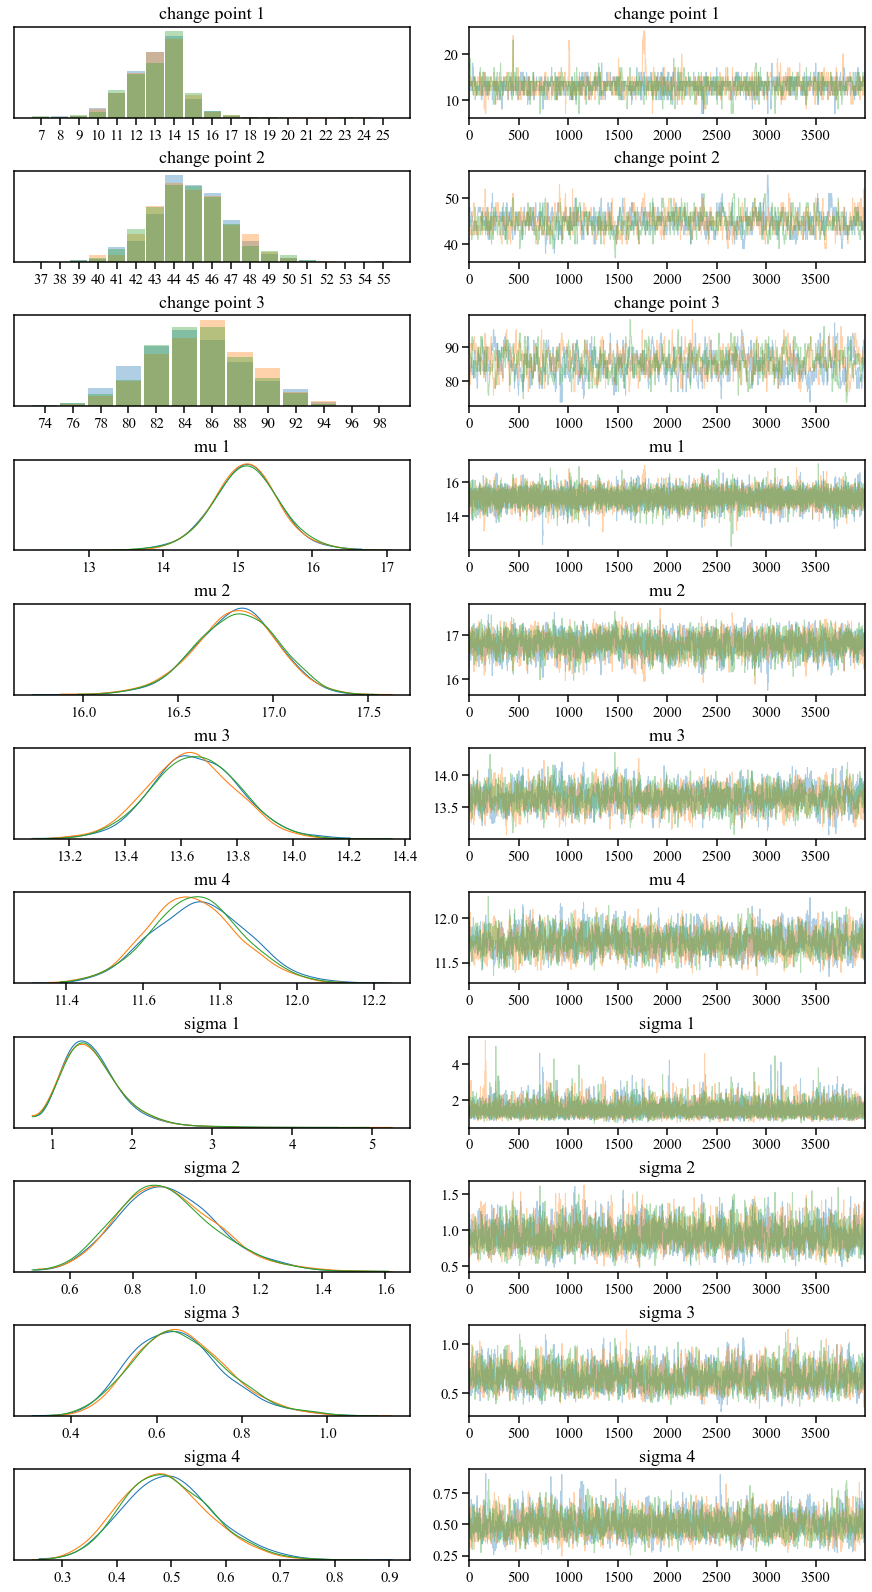

In [260]:
axes = pm.traceplot(trace)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.titlepad'] = 8

for axlist in axes:
    for ax in axlist:
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]
        ax.tick_params(axis='both', length=7, labelsize=15, width=1.5)
        ax.title.set_fontsize(18)
        
        ax.spines["top"].set_linewidth(1.5)
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(1.5)
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\7_water.png", dpi=1000)

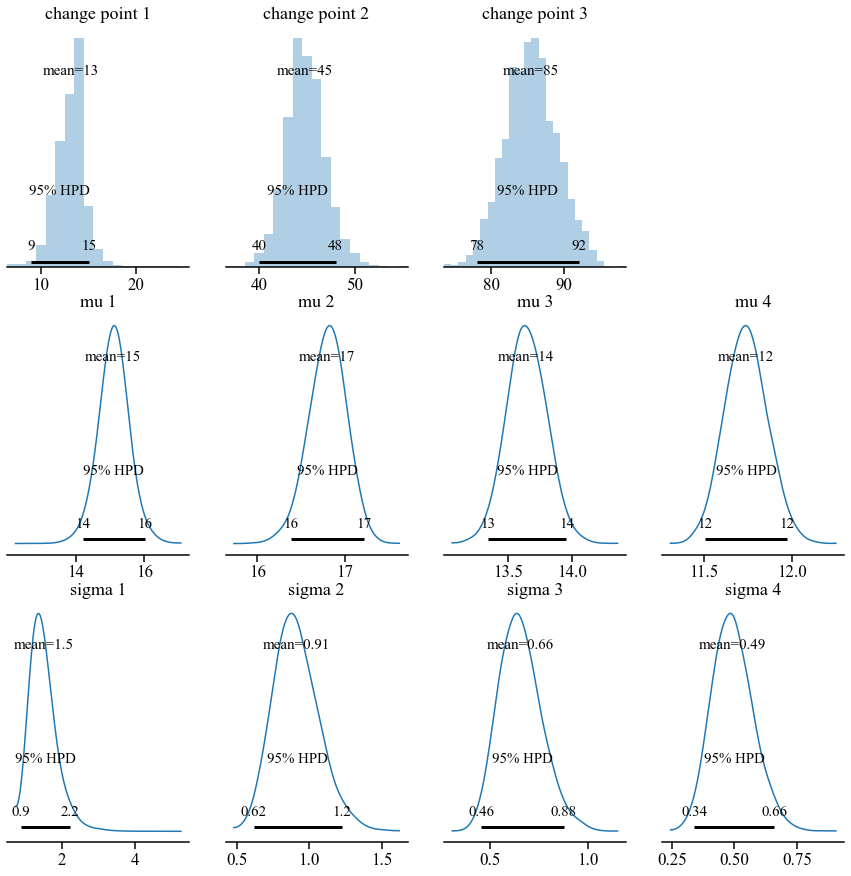

In [261]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

pm.plot_posterior(trace, var_names=['change point 1'], ax=ax[0, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['change point 2'], ax=ax[0, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['change point 3'], ax=ax[0, 2], credible_interval=0.95)

pm.plot_posterior(trace, var_names=['mu 1'], ax=ax[1, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 2'], ax=ax[1, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 3'], ax=ax[1, 2], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['mu 4'], ax=ax[1, 3], credible_interval=0.95)

pm.plot_posterior(trace, var_names=['sigma 1'], ax=ax[2, 0], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 2'], ax=ax[2, 1], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 3'], ax=ax[2, 2], credible_interval=0.95)
pm.plot_posterior(trace, var_names=['sigma 4'], ax=ax[2, 3], credible_interval=0.95)

for subplots in ax:
    for subplot in subplots:
        labels = subplot.get_xticklabels() + subplot.get_yticklabels()
        [label.set_fontname('times new roman') for label in labels]
        subplot.tick_params(axis='x', length=7, labelsize=17, color='black', width=1.5)
        subplot.title.set_fontsize(18)
        subplot.spines["bottom"].set_color("black")
        subplot.spines["bottom"].set_linewidth(1.5)
ax[0, 3].axis("off")
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\8_water.png", dpi=1000)

In [262]:
pm.rhat(trace)

<xarray.Dataset>
Dimensions:         ()
Data variables:
    change point 1  float64 1.002
    change point 2  float64 1.007
    change point 3  float64 1.006
    mu 1            float64 1.0
    mu 2            float64 1.002
    mu 3            float64 1.005
    mu 4            float64 1.004
    sigma 1         float64 0.9999
    sigma 2         float64 1.003
    sigma 3         float64 1.002
    sigma 4         float64 1.003

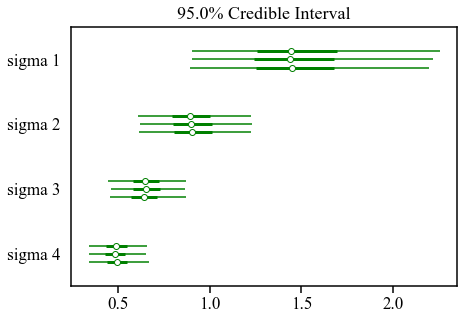

In [266]:
fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.5))
plt.rcParams['axes.titlepad'] = 8
pm.forestplot(trace, colors='green', var_names=['sigma 1', 'sigma 2', 'sigma 3', 'sigma 4'], markersize=8, ax=subplot, credible_interval=0.95)


labels = subplot.get_xticklabels() + subplot.get_yticklabels()
[label.set_fontname('times new roman') for label in labels]
subplot.tick_params(axis='both', length=7, labelsize=17, color='black', width=1.5)
subplot.title.set_fontsize(18)
subplot.spines["bottom"].set_color("black")
subplot.spines["bottom"].set_linewidth(1.5)
subplot.spines["top"].set_color("black")
subplot.spines["top"].set_linewidth(1.5)
subplot.spines['left'].set_visible(True)
subplot.spines["left"].set_color("black")
subplot.spines["left"].set_linewidth(1.5)
subplot.spines['right'].set_visible(True)
subplot.spines["right"].set_color("black")
subplot.spines["right"].set_linewidth(1.5)

plt.subplots_adjust(left=0.21, right=0.88, top=0.92, bottom=0.12)

plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\9_water_sigma.png", dpi=1000)

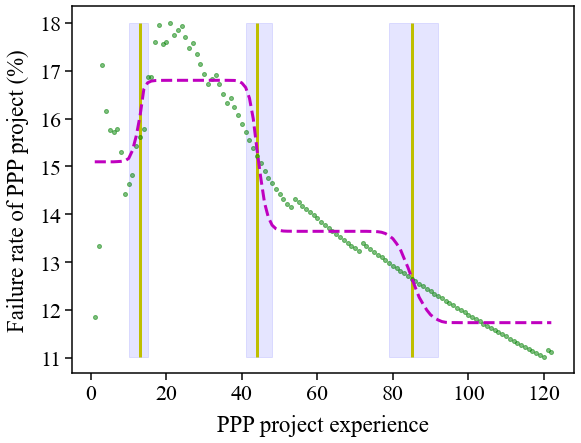

In [281]:
fig, ax = plt.subplots(figsize=(9, 6.75))
ax.plot(X, Y, '.', markersize=8, c='green', alpha=0.5)

ax.set_ylabel("Failure rate of PPP project (%)", fontsize=23, fontname='times new roman', labelpad=10)
ax.set_xlabel("PPP project experience", fontsize=23, fontname='times new roman', labelpad=10)

ax.vlines(trace['change point 1'].mean().astype(int), Y.min(), Y.max(), color='y', linewidth=3)
ax.vlines(trace['change point 2'].mean().astype(int), Y.min(), Y.max(), color='y', linewidth=3)
ax.vlines(trace['change point 3'].mean().astype(int), Y.min(), Y.max(), color='y', linewidth=3)

average_failures = np.zeros_like(Y, dtype='float')

for i, year in enumerate(X):
    idx1 = year < trace['change point 1']
    idx2 = (year >= trace['change point 1']) & (year < trace['change point 2'])
    idx3 = (year >= trace['change point 2']) & (year < trace['change point 3'])
    idx4 = year >= trace['change point 3']
    
    average_failures[i] = (trace['mu 1'][idx1].sum() + 
                           trace['mu 2'][idx2].sum() + 
                           trace['mu 3'][idx3].sum() + 
                           trace['mu 4'][idx4].sum()) / (len(trace) * trace.nchains)

sp_hpd1 = pm.hpd(trace['change point 1'])
sp_hpd2 = pm.hpd(trace['change point 2'])
sp_hpd3 = pm.hpd(trace['change point 3'])

plt.fill_betweenx(y=[Y.min(), Y.max()],
                  x1=sp_hpd1[0], x2=sp_hpd1[1], alpha=0.1, color='b')
plt.fill_betweenx(y=[Y.min(), Y.max()],
                  x1=sp_hpd2[0], x2=sp_hpd2[1], alpha=0.1, color='b')
plt.fill_betweenx(y=[Y.min(), Y.max()],
                  x1=sp_hpd3[0], x2=sp_hpd3[1], alpha=0.1, color='b')

labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('times new roman') for label in labels]
ax.tick_params(axis='both', length=7, labelsize=22, color='black', width=1.5)

ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(1.5)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_color("black")
ax.spines["right"].set_linewidth(1.5)

    
ax.plot(X, average_failures,'m--', lw=3)
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\10_water.png", dpi=1000)

In [14]:
map_transport = PPP_Transport.groupby('countrycode').size().to_frame()
map_transport.reset_index(inplace=True)
map_transport.columns=['countrycode','number']
map_transport['level'] = 0
#13, 39, 80, 112
map_transport.loc[map_transport['number'] <= 13, 'level'] = 1
map_transport.loc[(map_transport['number'] > 13) & (map_transport.number <= 39), 'level'] = 2
map_transport.loc[(map_transport['number'] > 39) & (map_transport.number <= 80), 'level'] = 3
map_transport.loc[(map_transport['number'] > 80) & (map_transport.number <= 112), 'level'] = 4
map_transport.loc[map_transport['number'] > 112,  'level'] = 5

In [15]:
map_transport

,countrycode,number,level
0,AGO,1,1
1,ALB,2,1
2,ARG,83,4
3,ARM,3,1
4,BEN,1,1
...,...,...,...
73,XKX,1,1
74,YEM,2,1
75,ZAF,10,1
76,ZMB,1,1


In [8]:
map_energy = PPP_Energy.groupby('countrycode').size().to_frame()
map_energy.reset_index(inplace=True)
map_energy.columns=['countrycode','number']
map_energy['level'] = 0
#30, 57, 125
map_energy.loc[map_energy['number'] <= 30, 'level'] = 1
map_energy.loc[(map_energy['number'] > 30) & (map_energy.number <= 57), 'level'] = 2
map_energy.loc[(map_energy['number'] > 57) & (map_energy.number <= 125), 'level'] = 3
map_energy.loc[ map_energy['number'] > 125, 'level'] = 4

In [9]:
map_water = PPP_Water.groupby('countrycode').size().to_frame()
map_water.reset_index(inplace=True)
map_water.columns=['countrycode','number']
map_water['level'] = 0
#13, 45, 85, 122
map_water.loc[map_water['number'] <= 13, 'level'] = 1
map_water.loc[(map_water['number'] > 13) & (map_water.number <= 45), 'level'] = 2
map_water.loc[(map_water['number'] > 45) & (map_water.number <= 85), 'level'] = 3
map_water.loc[(map_water['number'] > 85) & (map_water.number <= 122), 'level'] = 4
map_water.loc[ map_water['number'] > 122, 'level'] = 5

In [10]:
import geopandas as gpd
from matplotlib.collections import PatchCollection
from descartes.patch import PolygonPatch

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.drop(columns=['pop_est', 'continent', 'name', 'gdp_md_est'], inplace=True)

In [11]:
transport_plotting = world.merge(map_transport, how='left', left_on='iso_a3', right_on='countrycode')
transport_plotting.drop(columns=['countrycode'], inplace=True)
transport_plotting.level.fillna(0, inplace=True)
transport_plotting.level.astype('int')

energy_plotting = world.merge(map_energy, how='left', left_on='iso_a3', right_on='countrycode')
energy_plotting.drop(columns=['countrycode'], inplace=True)
energy_plotting.level.fillna(0, inplace=True)
energy_plotting.level.astype('int')

water_plotting = world.merge(map_water, how='left', left_on='iso_a3', right_on='countrycode')
water_plotting.drop(columns=['countrycode'], inplace=True)
water_plotting.level.fillna(0, inplace=True)
water_plotting.level.astype('int')

0      0
1      1
2      0
3      0
4      0
      ..
172    1
173    1
174    0
175    0
176    0
Name: level, Length: 177, dtype: int32

In [61]:
pts = np.array([(pt.x, pt.y) for pt in tt.centroid])

In [13]:
np.unique(water_plotting['level'])

array([0., 1., 2., 3., 4., 5.])

In [22]:
tt = transport_plotting.copy()
tt.level = 1

In [23]:
tt

,iso_a3,geometry,number,level
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,1
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",4.0,1
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,1
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,1
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,1
...,...,...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,1
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,1
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,1
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,1


In [26]:
world1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [48]:
transport_plotting.loc[transport_plotting.iso_a3 == 'TWN', 'level'] = 5.0

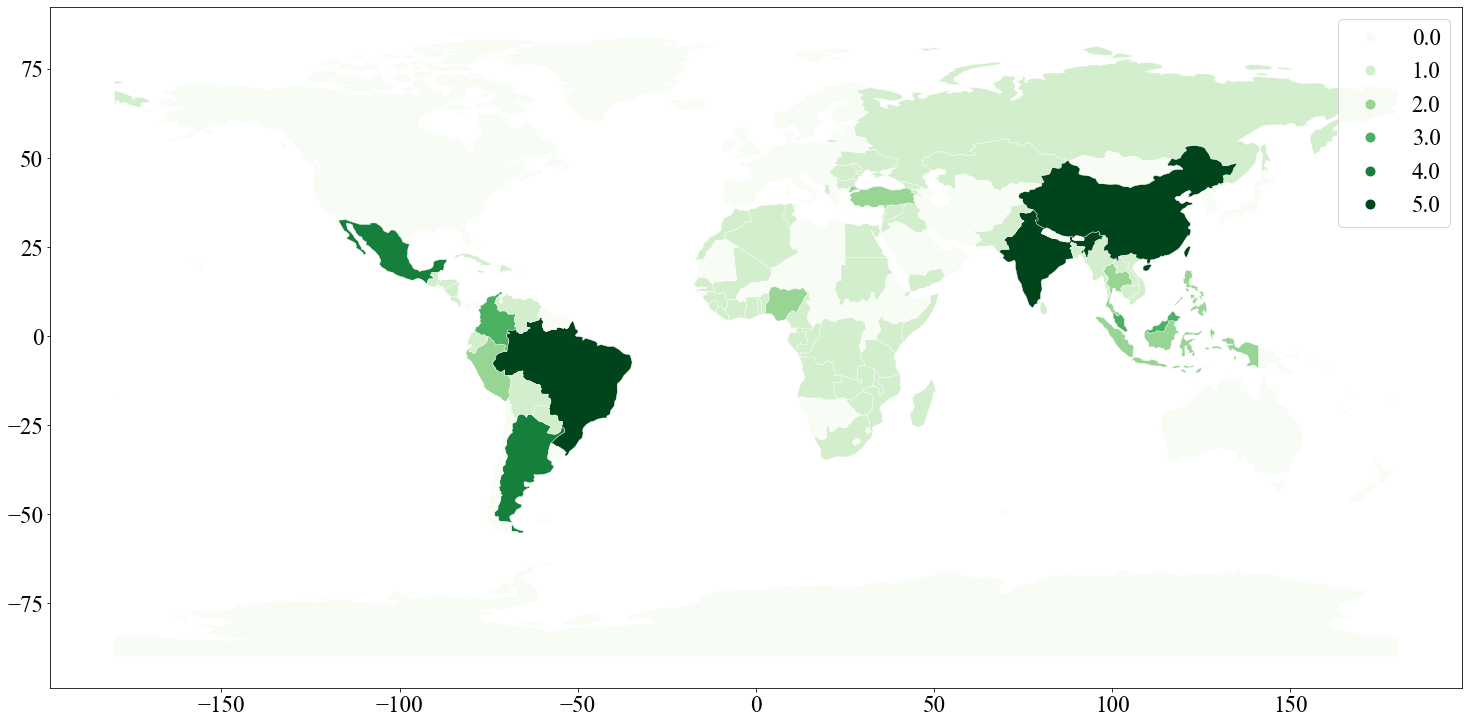

In [49]:
fig = plt.figure(figsize=(20, 12))

plt.rcParams['font.family'] = 'Times new roman'
plt.rcParams.update({'font.size': 23})
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

ax = fig.add_subplot(111)
transport_plotting.plot(column='level', categorical=True, ax = ax, legend=True, cmap='Greens',linewidth=0.4, edgecolor='white')


In [58]:
tt = energy_plotting.drop(energy_plotting[energy_plotting.iso_a3 == 'TWN'].index).copy()
bb = water_plotting.drop(water_plotting[energy_plotting.iso_a3 == 'TWN'].index).copy()

In [59]:
tt

,iso_a3,geometry,number,level
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.0,1.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",11.0,1.0
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,0.0
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,0.0
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,0.0
...,...,...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,1.0
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,0.0
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,0.0
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,0.0


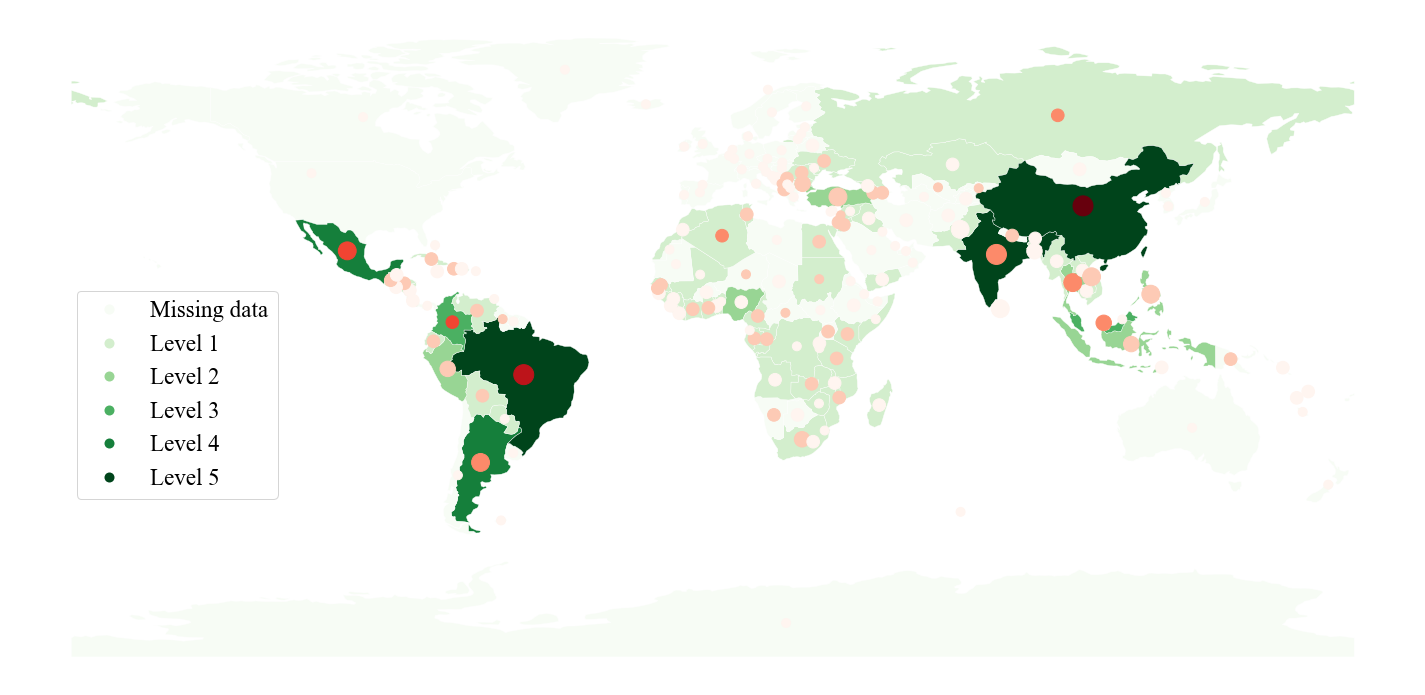

In [65]:
fig = plt.figure(figsize=(20, 12))

plt.rcParams['font.family'] = 'Times new roman'
plt.rcParams.update({'font.size': 23})
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

ax = fig.add_subplot(111)
transport_plotting.plot(column='level', categorical=True, ax = ax, legend=True, cmap='Greens',linewidth=0.4, edgecolor='white')

scatter = ax.scatter(pts[:, 0], pts[:, 1], s=(tt['level'].values + 1) * 80, c=bb['level'].values, cmap="Reds")
ax.set_axis_off()
new_labels=[
            'Missing data',
            'Level 1',
            'Level 2',
            'Level 3',
            'Level 4',
            'Level 5',          
]
ax.get_legend().set_bbox_to_anchor((.2, .6))

leg = ax.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)
plt.savefig(r"C:\PPP\Thesis\Database\CSV format data by python\32.png", dpi=1000)

In [ ]:
new_labels=[
            'Missing data',
            'Low',
            'Low-medium',
            'High-medium',
            'High',          
]

leg = ax.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)

In [292]:
PPP_Transport.

,index,IY,country,Region,FCY,status_n,DSU,sector,period,countrycode,Duration
0,7,1990,Argentina,LAC,1990-09-01,Active,NaT,Transport,28.0,ARG,NaN
1,10,1990,Mexico,LAC,1990-11-01,Active,NaT,Transport,30.0,MEX,NaN
2,19,1990,Thailand,EAP,1990-12-01,Active,NaT,Transport,27.0,THA,NaN
4,26,1990,Mexico,LAC,1990-12-01,Active,NaT,Transport,60.0,MEX,NaN
5,28,1990,Mexico,LAC,1990-03-01,Active,NaT,Transport,30.0,MEX,NaN


In [37]:
Useful_data[Useful_data.country=='Iran, Islamic Rep.']

,index,IY,country,Region,FCY,status_n,DSU,sector,period,countrycode,Duration
846,3508,2004,"Iran, Islamic Rep.",MENA,2004-06-01,Active,NaT,Energy,20.0,IRN,NaN
857,3472,2004,"Iran, Islamic Rep.",MENA,2004-07-01,Active,NaT,Energy,NaN,IRN,NaN
1156,4874,2007,"Iran, Islamic Rep.",MENA,2007-09-01,Active,2009-01-01,Energy,NaN,IRN,1.336099


In [146]:
PPP_Water_copy = PPP_Water[['Region', 'country']]
PPP_Water_copy['energy'] = 0

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
water_country = PPP_Water.groupby('country').size().to_frame()
water_country.columns = ['number']

In [148]:
for name in np.sort(water_country.loc[water_country['number'] <= 13].index.values): 
    PPP_Water_copy.loc[PPP_Water_copy.country == name, 'energy'] = 1      

In [149]:
for name in np.sort(water_country.loc[(water_country['number'] > 13) & (water_country.number <= 45)].index.values):
    PPP_Water_copy.loc[PPP_Water_copy.country == name, 'energy'] = 2

In [150]:
for name in np.sort(water_country.loc[(water_country['number'] > 45) & (water_country['number'] <= 85)].index.values):
    PPP_Water_copy.loc[PPP_Water_copy.country == name, 'energy'] = 3

In [151]:
for name in np.sort(water_country.loc[(water_country['number'] > 85) & (water_country['number'] <= 122)].index.values):
    PPP_Water_copy.loc[PPP_Water_copy.country == name, 'energy'] = 4    

In [152]:
for name in np.sort(water_country.loc[water_country['number'] > 122].index.values):
    PPP_Water_copy.loc[PPP_Water_copy.country == name, 'energy'] = 5

In [153]:
PPP_Water_copy = PPP_Water_copy.drop_duplicates(subset='country', keep="last")